<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 13: Join

Associated Textbook Section: [8.4](https://ccsf-math-108.github.io/textbook/chapters/08/4/Joining_Tables_by_Columns.html)

---

## Overview

* [Joins](#Joins)
* [Bay Wheels](#Bay-Wheels)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Joins

---

### Joining Two Tables

To join information in table called `discounts` with a table called `drinks` where the matching values are in the columns `'location'` and `'cafe'`, respectively, use the command:

<img src="./join_command.png" alt="An example join command with labels" width = 70%>

---

The following graph shows how the `drinks` and `discounts` tables are joined.

<img src="./join_example_table.png" alt="Three tables showing how two were joined into one." width = 90%>

---

### Demo: Joins

Create the `drinks` and `discounts` tables.

In [ ]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [ ]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


---

Join `discounts` with `drinks` based on the values in `Location` and `Cafe`, respectively.

In [ ]:
combined = drinks.join('Cafe',discounts,'Location')
combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


---

Add a `'Discounted Price'` column to the table showing the updated drink price after the coupon has been applied.

In [ ]:
discounted_frac = 1 - combined.column('Coupon % off') / 100
combined.with_column(
    'Discounted Price',
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


---

See what happens when you join tables with the same labels.

In [ ]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25


---

## Bay Wheels

---

<img src="./baywheels.webp" alt="A person holding balloons next to a Bay Wheels bike" width=50%>

The Bay Wheels License Agreement outlines that certain system data must be made public. `baywheels.csv` contains all the trips on January 31, 2024, from the [Bay Wheels System Data page](https://www.lyft.com/bikes/bay-wheels/system-data). We've calculated the trip duration (measured in seconds) and included it in the data. Also, we removed any trips that did not have a start or end station name.

---

### Demo: Analyzing Bay Wheels

Load that data into a table called `trips`.

In [ ]:
trips = Table.read_table('baywheels.csv')
trips

rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration
classic_bike,2024-01-31 09:46:00,2024-01-31 09:56:32,Howard St at 8th St,Folsom St at 19th St,37.7765,-122.411,37.7606,-122.415,member,632
electric_bike,2024-01-31 08:42:48,2024-01-31 08:52:16,Berry St at 4th St,Montgomery St BART Station (Market St at 2nd St),37.776,-122.393,37.7896,-122.401,member,568
electric_bike,2024-01-31 08:15:30,2024-01-31 08:28:12,23rd St at San Bruno Ave,Montgomery St BART Station (Market St at 2nd St),37.7545,-122.404,37.7896,-122.401,member,762
electric_bike,2024-01-31 08:18:50,2024-01-31 08:28:14,3rd St at Townsend St,Montgomery St BART Station (Market St at 2nd St),37.7787,-122.392,37.7896,-122.401,member,564
electric_bike,2024-01-31 08:09:58,2024-01-31 08:18:56,Laguna St at Grove St,Montgomery St BART Station (Market St at 2nd St),37.7776,-122.427,37.7896,-122.401,member,538
classic_bike,2024-01-31 08:57:50,2024-01-31 08:59:13,Terry Francois Blvd at Mission Bay Blvd N,Terry Francois Blvd at Warriors Way,37.7718,-122.387,37.7691,-122.386,member,83
electric_bike,2024-01-31 12:05:53,2024-01-31 12:12:45,Mechanics Monument Plaza (Market St at Bush St),Townsend St at 5th St,37.7913,-122.399,37.7752,-122.397,casual,412
electric_bike,2024-01-31 10:19:43,2024-01-31 10:25:45,Valencia St at 16th St,Valencia St at Cesar Chavez St,37.7655,-122.422,37.7477,-122.42,member,362
classic_bike,2024-01-31 18:38:06,2024-01-31 18:38:18,Berry St at 4th St,Berry St at 4th St,37.776,-122.393,37.776,-122.393,member,12
electric_bike,2024-01-31 14:37:44,2024-01-31 14:38:06,Berry St at 4th St,Berry St at 4th St,37.776,-122.393,37.776,-122.393,member,22


---

Create a table showing the top 10 longest (duration) rides.

In [ ]:
top10 = trips.sort('duration', True).take(np.arange(10))
top10

rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration
classic_bike,2024-01-31 17:09:48,2024-02-01 07:13:35,Valencia St at 24th St,Church St at Duboce Ave,37.7524,-122.421,37.7698,-122.429,casual,50627
classic_bike,2024-01-31 20:36:17,2024-02-01 07:52:33,Mason St at Bay St,Market St at Steuart St,37.8055,-122.414,37.7945,-122.395,casual,40576
classic_bike,2024-01-31 23:32:53,2024-02-01 07:52:33,Terry Francois Blvd at Warriors Way,Market St at Steuart St,37.7691,-122.386,37.7945,-122.395,member,29980
classic_bike,2024-01-31 11:34:28,2024-01-31 15:52:24,Victoria Manalo Draves Park,Hubbell St at 16th St,37.7778,-122.406,37.7666,-122.398,member,15476
classic_bike,2024-01-31 09:04:01,2024-01-31 11:06:01,1st St at Folsom St,2nd St at Folsom St,37.7873,-122.394,37.7852,-122.396,casual,7320
classic_bike,2024-01-31 09:06:27,2024-01-31 11:05:58,1st St at Folsom St,2nd St at Folsom St,37.7873,-122.394,37.7852,-122.396,casual,7171
classic_bike,2024-01-31 20:12:50,2024-01-31 22:00:58,2nd St at Folsom St,Montgomery St BART Station (Market St at 2nd St),37.7852,-122.396,37.7896,-122.401,member,6488
electric_bike,2024-01-31 09:32:37,2024-01-31 11:10:26,Divisadero St at Clay St,Clement St at 32nd Ave,37.7895,-122.441,37.7817,-122.493,casual,5869
electric_bike,2024-01-31 09:32:57,2024-01-31 11:10:40,Divisadero St at Clay St,Clement St at 32nd Ave,37.7895,-122.441,37.7817,-122.493,casual,5863
electric_bike,2024-01-31 14:46:33,2024-01-31 16:20:26,Golden Gate Ave at Polk St,Golden Gate Ave at Polk St,37.7811,-122.418,37.7814,-122.419,casual,5633


In [ ]:
max_duration = top10.column('duration').item(0)
print(f'The longest ride was {max_duration / (60 * 60):.2f} hours!')

The longest ride was 14.06 hours!


---

Visualize the distribution of ride durations that were less than 1 hour.

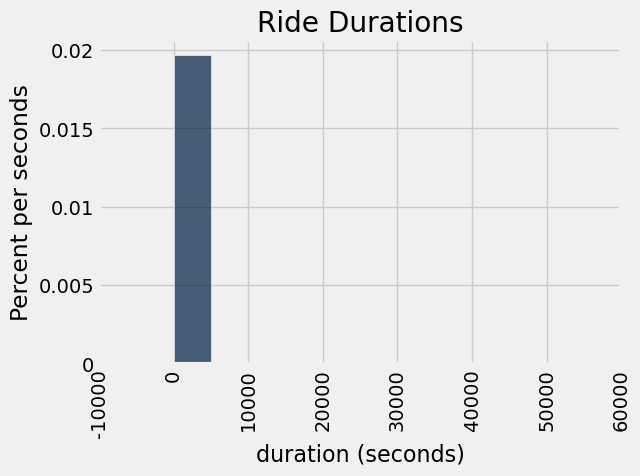

In [ ]:
trips.hist('duration',unit='seconds')

plt.title('Ride Durations')
plt.show()

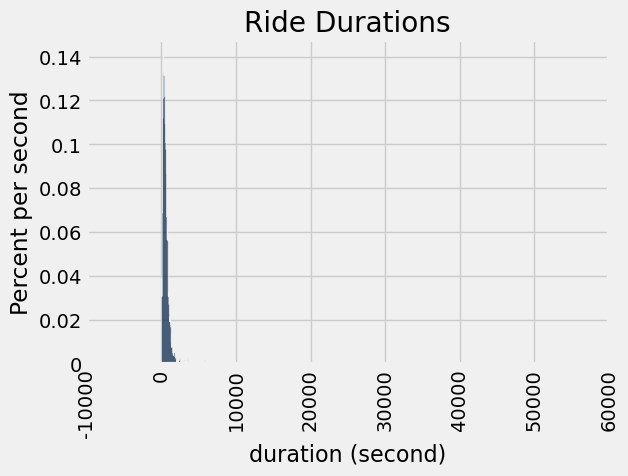

In [ ]:
trips.hist('duration', unit='second', bins=1000)

plt.title('Ride Durations')
plt.show()

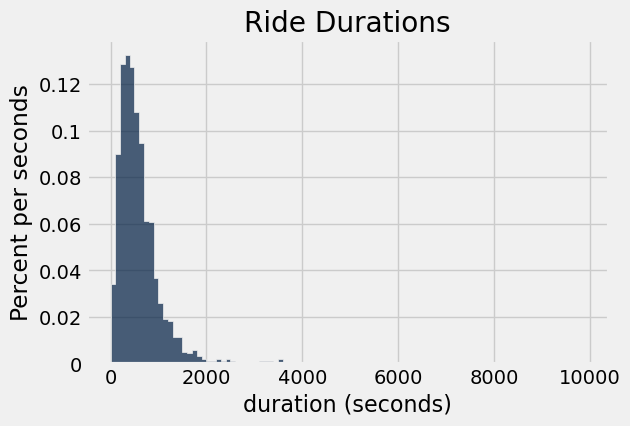

In [ ]:
trips.hist('duration',unit='seconds', bins=np.arange(0,10000,100))

plt.title('Ride Durations')
plt.show()

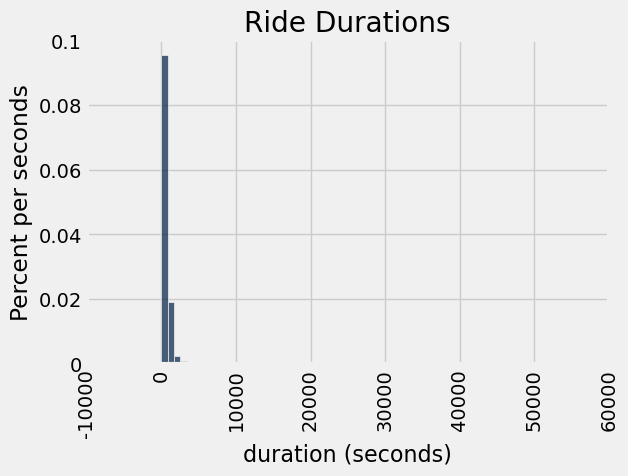

In [ ]:
trips.hist('duration',unit='seconds', bins=60)

plt.title('Ride Durations')
plt.show()

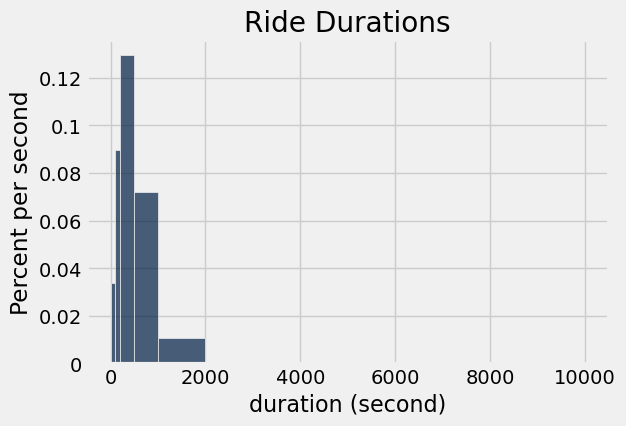

In [ ]:
trips.hist('duration', unit='second', bins=[0, 100, 200, 500, 1000, 2000, 5000, 10000])

plt.title('Ride Durations')
plt.show()

In [ ]:
short_trips = trips.where('duration', are.below(3600))
short_trips

rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration
classic_bike,2024-01-31 09:46:00,2024-01-31 09:56:32,Howard St at 8th St,Folsom St at 19th St,37.7765,-122.411,37.7606,-122.415,member,632
electric_bike,2024-01-31 08:42:48,2024-01-31 08:52:16,Berry St at 4th St,Montgomery St BART Station (Market St at 2nd St),37.776,-122.393,37.7896,-122.401,member,568
electric_bike,2024-01-31 08:15:30,2024-01-31 08:28:12,23rd St at San Bruno Ave,Montgomery St BART Station (Market St at 2nd St),37.7545,-122.404,37.7896,-122.401,member,762
electric_bike,2024-01-31 08:18:50,2024-01-31 08:28:14,3rd St at Townsend St,Montgomery St BART Station (Market St at 2nd St),37.7787,-122.392,37.7896,-122.401,member,564
electric_bike,2024-01-31 08:09:58,2024-01-31 08:18:56,Laguna St at Grove St,Montgomery St BART Station (Market St at 2nd St),37.7776,-122.427,37.7896,-122.401,member,538
classic_bike,2024-01-31 08:57:50,2024-01-31 08:59:13,Terry Francois Blvd at Mission Bay Blvd N,Terry Francois Blvd at Warriors Way,37.7718,-122.387,37.7691,-122.386,member,83
electric_bike,2024-01-31 12:05:53,2024-01-31 12:12:45,Mechanics Monument Plaza (Market St at Bush St),Townsend St at 5th St,37.7913,-122.399,37.7752,-122.397,casual,412
electric_bike,2024-01-31 10:19:43,2024-01-31 10:25:45,Valencia St at 16th St,Valencia St at Cesar Chavez St,37.7655,-122.422,37.7477,-122.42,member,362
classic_bike,2024-01-31 18:38:06,2024-01-31 18:38:18,Berry St at 4th St,Berry St at 4th St,37.776,-122.393,37.776,-122.393,member,12
electric_bike,2024-01-31 14:37:44,2024-01-31 14:38:06,Berry St at 4th St,Berry St at 4th St,37.776,-122.393,37.776,-122.393,member,22


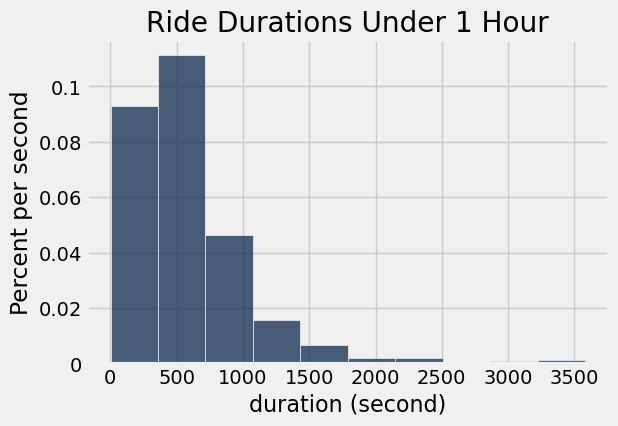

In [ ]:
short_trips.hist('duration', unit='second')

plt.title('Ride Durations Under 1 Hour')
plt.show()

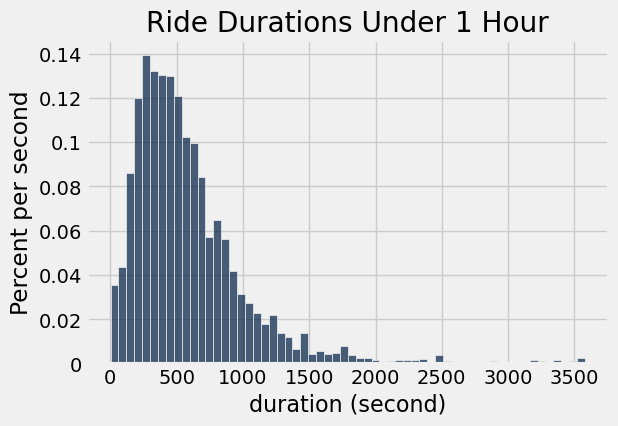

In [ ]:
short_trips.hist('duration', bins=60, unit='second')

plt.title('Ride Durations Under 1 Hour')
plt.show()

---

Of the trips lasting under 1 hour, which station had the most rides start from it?

In [ ]:
starts = short_trips.group('start_station_name').sort('count', descending=True)
starts

start_station_name,count
Market St at Steuart St,41
San Francisco Caltrain (Townsend St at 4th St),40
Embarcadero BART Station (Beale St at Market St),34
Salesforce Transit Center (Natoma St at 2nd St),31
Montgomery St BART Station (Market St at 2nd St),29
Berry St at 4th St,28
Koshland Park (Page St at Buchanan St),28
Laguna St at Hayes St,28
Market St at 10th St,28
Market St at Dolores St,27


In [ ]:
starts.column('start_station_name').item(0)

'Market St at Steuart St'

In [ ]:
from IPython.display import IFrame

url = 'https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d3152\
.8111265440043!2d-122.39737402373477!3d37.794465871980364!2m3!1f0\
!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x80858066a4c18685%3A0\
xd1df1656cf431ada!2sMarket%20St%20%26%20Steuart%20St%2C%20San%20F\
rancisco%2C%20CA%2094105!5e0!3m2!1sen!2sus!4v1707929255530!5m2!1s\
en!2sus'
IFrame(url, width=600, height=450)

---

There is another data file called `stations.csv` that contains just the latitude and longitude for each station. Join that data with the `starts` table.

In [ ]:
stations = Table.read_table('stations.csv')
stations

lat,lon,label
37.7745,-122.414,*Howard St at Grace St
37.7642,-122.467,10th Ave at Irving St
37.8691,-122.293,10th St at University Ave
37.7701,-122.412,11th St at Bryant St
37.7734,-122.416,11th St at Natoma St
37.803,-122.27,13th St at Franklin St
37.7804,-122.473,14th Ave at Geary Blvd
37.7683,-122.42,14th St at Mission St
37.7671,-122.407,15th St at Potrero Ave
37.7648,-122.42,16th St Mission BART


In [ ]:
starts_geo = starts.join('start_station_name', stations, 'label')
starts_geo

start_station_name,count,lat,lon
*Howard St at Grace St,13,37.7745,-122.414
10th Ave at Irving St,2,37.7642,-122.467
10th St at University Ave,1,37.8691,-122.293
11th St at Bryant St,8,37.7701,-122.412
11th St at Natoma St,8,37.7734,-122.416
13th St at Franklin St,1,37.803,-122.27
14th Ave at Geary Blvd,1,37.7804,-122.473
14th St at Mission St,10,37.7683,-122.42
15th St at Potrero Ave,4,37.7671,-122.407
16th St Mission BART,1,37.7648,-122.42


---

Use [`Circle`](https://datascience.readthedocs.io/en/master/maps.html#datascience.maps.Circle) to create a map visualization of all the stations with the marker at each station proportional to the number of trips started from that station.

Note that `Circle` requires that the table columns used be labeled and ordered in a certain way.

In [ ]:
starts_geo = starts_geo.select('lat', 'lon', 'start_station_name', 'count')
starts_geo = starts_geo.relabeled('start_station_name', 'labels')
starts_geo = starts_geo.with_column('area',
 starts_geo.column('count') / sum(starts_geo.column('count')) * 100_000)
starts_geo.sort('count', True)

lat,lon,labels,count,area
37.7946,-122.395,Market St at Steuart St,41,1281.65
37.7767,-122.395,San Francisco Caltrain (Townsend St at 4th St),40,1250.39
37.7924,-122.398,Embarcadero BART Station (Beale St at Market St),34,1062.83
37.7874,-122.398,Salesforce Transit Center (Natoma St at 2nd St),31,969.053
37.79,-122.401,Montgomery St BART Station (Market St at 2nd St),29,906.533
37.776,-122.393,Berry St at 4th St,28,875.274
37.7734,-122.427,Koshland Park (Page St at Buchanan St),28,875.274
37.7762,-122.426,Laguna St at Hayes St,28,875.274
37.7766,-122.417,Market St at 10th St,28,875.274
37.7693,-122.427,Market St at Dolores St,27,844.014


In [ ]:
Circle.map_table(starts_geo)

---

Of the trips lasting under 1 hour, what is the longest ride for each start/end combination?

In [ ]:
short_trips.pivot('start_station_name', 'end_station_name',
                  values='duration', collect=np.max)

end_station_name,*Howard St at Grace St,10th Ave at Irving St,10th St at University Ave,11th St at Bryant St,11th St at Natoma St,13th St at Franklin St,14th Ave at Geary Blvd,14th St at Mission St,15th St at Potrero Ave,16th St Mission BART,16th St Mission BART Station 2,16th St at Prosper St,17th & Folsom Street Park (17th St at Folsom St),17th Ave at Geary Blvd,17th St at Dolores St,17th St at Valencia St,18th Ave at California St,18th St at Noe St,19th St at Florida St,19th St at Mission St,19th St at William St,19th Street BART Station,1st St at Folsom St,1st St at San Carlos St,1st St at Younger Ave,20th St at Bryant St,20th St at Dolores St,2100 Powell St,21st Ave at Noriega St,21st St at 5th Ave,22nd St Caltrain Station,22nd St at Potrero Ave,23rd Ave at Clement St,23rd St at San Bruno Ave,23rd St at Santa Clara St,23rd St at Telegraph Ave,23rd St at Tennessee St,24th St BART Station,24th St at Chattanooga St,25th Ave at Irving St,26th Ave at Clement St,26th Ave at Noriega St,27th St at MLK Jr Way,29th St at Church St,29th St at Tiffany Ave,2nd Ave at E 18th St,2nd St at Folsom St,2nd St at Julian St,2nd St at Townsend St,30th St at San Jose Ave,32nd St at Adeline St,34th Ave at Balboa St,34th St at Telegraph Ave,36th Ave at Spreckels Lake Dr,37th Ave at Ortega St,37th St at West St,38th Ave at Balboa St,3rd St at Keyes St,3rd St at Townsend St,41st Ave at Irving St,43rd Ave at Lawton St,45th Ave at Noriega St,45th St at MLK Jr Way,45th St at Manila,47th St at San Pablo Ave,48th Ave at Cabrillo St,4th St at 16th St,4th St at Gene Friend Way,4th St at Harrison St,4th St at Long Bridge St,4th St at Mission Bay Blvd S,4th St at San Carlos St,55th St at Telegraph Ave,59th St at Horton St,5th Ave at Anza St,5th St at Howard St,5th St at San Salvador St,5th St at Virginia St,62nd St at Claremont Ave,7th Ave at Cabrillo St,7th Ave at Clement St,7th Ave at Irving St,7th Ave at Lawton St,7th St at King St,8th Ave at John F Kennedy Dr,8th St at Brannan St,8th St at Hooper St,8th St at Ringold St,9th Ave at Geary Blvd,9th St at San Fernando St,Adeline St at 40th St,Alameda St at Henry Adams St,Alamo Square (Steiner St at Fulton St),Allyne Park (Green St at Gough St),Almaden Blvd at San Fernando St,Anza St at 19th Ave,Anza St at Collins St,Arguello Blvd at Edward St,Arguello Blvd at Geary Blvd,Arlington St at Roanoke St,Ashby BART Station,Autumn Parkway at Coleman Ave,Auzerais Ave at Los Gatos Creek Trail,Backesto Park (Jackson St at 13th St),Balboa Park BART 2,Bancroft Way at Telegraph Ave,Battery St at Filbert St,Bay Pl at Vernon St,Bay St at Fillmore St,Beale St at Harrison St,Berry St at 4th St,Berry St at King St,Bestor Art Park,Brannan St at 4th St,Brannan St at 7th St,Brannan St at Colin P Kelly Jr St,Brannan St at Harriet St,Brazil Ave at La Grande Ave,Brighton Ave at Ocean Ave,Broadway at 30th St,Broadway at 40th St,Broadway at Battery St,Broadway at Coronado Ave,Broadway at Kearny St,Broderick St at Oak St,Bryant St at 2nd St,Bryant St at 6th St,Buchanan St at Lombard St,Buchanan St at North Point St,Bushrod Park,Cahill Park,Carl St at Cole St,Cesar Chavez St at Dolores St,Channing Way at Shattuck Ave,Chestnut St at Van Ness Ave,China Basin St at 3rd St,Church St at Duboce Ave,Civic Center/UN Plaza BART Station (Market St at McAllister St),Clay St at Battery St,Clay St at Lyon St,Clement St at 32nd Ave,College Ave at Alcatraz Ave,Commercial St at Montgomery St,Cruise Terminal at Pier 27,Cyril Magnin St at Ellis St,Davis St at Jackson St,DeFremery Park,Delancey St at Brannan St,Derby St at College Ave,Devine St at San Pedro St,Divisadero St at Clay St,Divisadero St at Lombard St,Division St at Potrero Ave,Dolores St at 15th St,Dolores St at 22nd St,Downtown Berkeley BART,Duboce Park,E Virginia St at S 2nd St,El Embarcadero at Grand Ave,Ellis St at Pierce St,Ellsworth St at Russell St,Embarcadero BART Station (Beale St at Market St),Esprit Park (19th St at Minnesota St),Euclid Ave at Hearst Ave,Eureka Valley Recreation Cen

In [ ]:
short_trips.pivot('start_station_name', 'end_station_name',
                  values='duration', collect=np.average)

end_station_name,*Howard St at Grace St,10th Ave at Irving St,10th St at University Ave,11th St at Bryant St,11th St at Natoma St,13th St at Franklin St,14th Ave at Geary Blvd,14th St at Mission St,15th St at Potrero Ave,16th St Mission BART,16th St Mission BART Station 2,16th St at Prosper St,17th & Folsom Street Park (17th St at Folsom St),17th Ave at Geary Blvd,17th St at Dolores St,17th St at Valencia St,18th Ave at California St,18th St at Noe St,19th St at Florida St,19th St at Mission St,19th St at William St,19th Street BART Station,1st St at Folsom St,1st St at San Carlos St,1st St at Younger Ave,20th St at Bryant St,20th St at Dolores St,2100 Powell St,21st Ave at Noriega St,21st St at 5th Ave,22nd St Caltrain Station,22nd St at Potrero Ave,23rd Ave at Clement St,23rd St at San Bruno Ave,23rd St at Santa Clara St,23rd St at Telegraph Ave,23rd St at Tennessee St,24th St BART Station,24th St at Chattanooga St,25th Ave at Irving St,26th Ave at Clement St,26th Ave at Noriega St,27th St at MLK Jr Way,29th St at Church St,29th St at Tiffany Ave,2nd Ave at E 18th St,2nd St at Folsom St,2nd St at Julian St,2nd St at Townsend St,30th St at San Jose Ave,32nd St at Adeline St,34th Ave at Balboa St,34th St at Telegraph Ave,36th Ave at Spreckels Lake Dr,37th Ave at Ortega St,37th St at West St,38th Ave at Balboa St,3rd St at Keyes St,3rd St at Townsend St,41st Ave at Irving St,43rd Ave at Lawton St,45th Ave at Noriega St,45th St at MLK Jr Way,45th St at Manila,47th St at San Pablo Ave,48th Ave at Cabrillo St,4th St at 16th St,4th St at Gene Friend Way,4th St at Harrison St,4th St at Long Bridge St,4th St at Mission Bay Blvd S,4th St at San Carlos St,55th St at Telegraph Ave,59th St at Horton St,5th Ave at Anza St,5th St at Howard St,5th St at San Salvador St,5th St at Virginia St,62nd St at Claremont Ave,7th Ave at Cabrillo St,7th Ave at Clement St,7th Ave at Irving St,7th Ave at Lawton St,7th St at King St,8th Ave at John F Kennedy Dr,8th St at Brannan St,8th St at Hooper St,8th St at Ringold St,9th Ave at Geary Blvd,9th St at San Fernando St,Adeline St at 40th St,Alameda St at Henry Adams St,Alamo Square (Steiner St at Fulton St),Allyne Park (Green St at Gough St),Almaden Blvd at San Fernando St,Anza St at 19th Ave,Anza St at Collins St,Arguello Blvd at Edward St,Arguello Blvd at Geary Blvd,Arlington St at Roanoke St,Ashby BART Station,Autumn Parkway at Coleman Ave,Auzerais Ave at Los Gatos Creek Trail,Backesto Park (Jackson St at 13th St),Balboa Park BART 2,Bancroft Way at Telegraph Ave,Battery St at Filbert St,Bay Pl at Vernon St,Bay St at Fillmore St,Beale St at Harrison St,Berry St at 4th St,Berry St at King St,Bestor Art Park,Brannan St at 4th St,Brannan St at 7th St,Brannan St at Colin P Kelly Jr St,Brannan St at Harriet St,Brazil Ave at La Grande Ave,Brighton Ave at Ocean Ave,Broadway at 30th St,Broadway at 40th St,Broadway at Battery St,Broadway at Coronado Ave,Broadway at Kearny St,Broderick St at Oak St,Bryant St at 2nd St,Bryant St at 6th St,Buchanan St at Lombard St,Buchanan St at North Point St,Bushrod Park,Cahill Park,Carl St at Cole St,Cesar Chavez St at Dolores St,Channing Way at Shattuck Ave,Chestnut St at Van Ness Ave,China Basin St at 3rd St,Church St at Duboce Ave,Civic Center/UN Plaza BART Station (Market St at McAllister St),Clay St at Battery St,Clay St at Lyon St,Clement St at 32nd Ave,College Ave at Alcatraz Ave,Commercial St at Montgomery St,Cruise Terminal at Pier 27,Cyril Magnin St at Ellis St,Davis St at Jackson St,DeFremery Park,Delancey St at Brannan St,Derby St at College Ave,Devine St at San Pedro St,Divisadero St at Clay St,Divisadero St at Lombard St,Division St at Potrero Ave,Dolores St at 15th St,Dolores St at 22nd St,Downtown Berkeley BART,Duboce Park,E Virginia St at S 2nd St,El Embarcadero at Grand Ave,Ellis St at Pierce St,Ellsworth St at Russell St,Embarcadero BART Station (Beale St at Market St),Esprit Park (19th St at Minnesota St),Euclid Ave at Hearst Ave,Eureka Valley Recreation Cen

In [ ]:
short_trips.select(['start_station_name', 'end_station_name', 'duration']).group(['start_station_name', 'end_station_name'],np.max)

start_station_name,end_station_name,duration max
*Howard St at Grace St,*Howard St at Grace St,927
*Howard St at Grace St,19th St at Florida St,486
*Howard St at Grace St,Folsom St at 13th St,198
*Howard St at Grace St,Jackson St at Sansome St,907
*Howard St at Grace St,San Francisco Caltrain (Townsend St at 4th St),499
*Howard St at Grace St,Townsend St at 6th St,447
*Howard St at Grace St,Union Square (Powell St at Post St),443
10th Ave at Irving St,Frederick St at Arguello Blvd,212
10th Ave at Irving St,Jackson St at Sansome St,1557
10th St at University Ave,San Pablo Park,656


In [ ]:
short_trips_select = short_trips.select('start_station_name', 'end_station_name', 'duration')
max_for_each = short_trips_select.group(['start_station_name', 'end_station_name'], max)
max_for_each.sort('duration max', True)

start_station_name,end_station_name,duration max
23rd St at Santa Clara St,Saint James Park,3580
Montgomery St at Pacific Ave,4th St at Long Bridge St,3578
Saint James Park,Paseo De San Antonio at 2nd St,3568
Salesforce Transit Center (Natoma St at 2nd St),Salesforce Transit Center (Natoma St at 2nd St),3568
Powell St BART Station (Market St at 5th St),Powell St at Columbus Ave,3523
McCoppin St at Valencia St,Otis St at Brady St,3517
Brighton Ave at Ocean Ave,The Embarcadero at Steuart St,3508
Davis St at Jackson St,Cruise Terminal at Pier 27,3401
22nd St Caltrain Station,22nd St Caltrain Station,3393
26th Ave at Noriega St,Harrison St at 20th St,3359


---

---

Visualize the distribution of bike type (electric/classic) for members and casual riders. Express the lengths of the bars as a percentage.

In [ ]:
trips.pivot('member_casual', 'rideable_type')

rideable_type,casual,member
classic_bike,156,680
electric_bike,414,1964


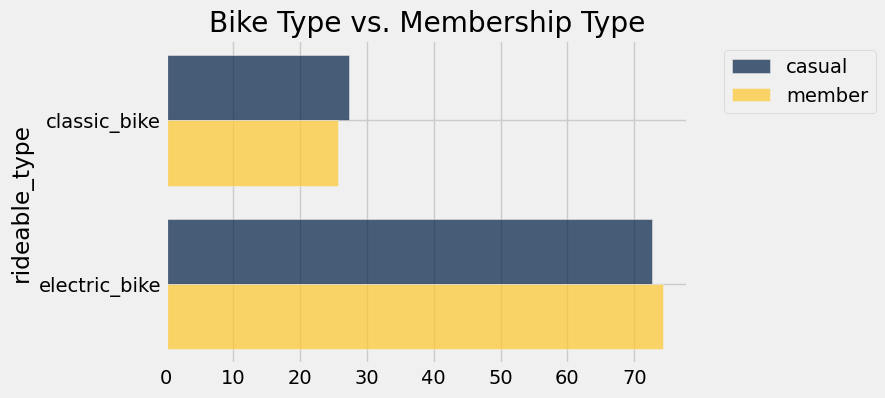

In [ ]:
trips_pivot = trips.pivot('member_casual', 'rideable_type')
casual_count = sum(trips_pivot.column('casual'))
member_count = sum(trips_pivot.column('member'))
trips_pivot = trips_pivot.with_columns(
    'casual', trips_pivot.column('casual') / casual_count * 100,
    'member', trips_pivot.column('member') / member_count * 100)
trips_pivot.barh('rideable_type')

plt.title('Bike Type vs. Membership Type')
plt.show()

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>